**Importing Dataset**

In [240]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [241]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [242]:
data=pd.read_csv('/content/Elon_musk.csv',encoding= 'unicode_escape')
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


**Preprocessing**

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


There are about 2000 data points which are all non null values

In [244]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


Initilising Objects of different methods

In [245]:
tokenizer=RegexpTokenizer(r'\w+')
stopword=set(stopwords.words('english'))
ps=PorterStemmer()

**Cleaning the data**

In [246]:
# Function for implimenting cleaning opertaions
def get_clean_text(text):
  text=text.lower() # converting all alpha to lower case
  tokens=tokenizer.tokenize(text) #splitting into each words
  new_tokens=[token for token in tokens if token not in stopword]   #creating new token which does not contain stopwords
  stemmed_token=[ps.stem(tokens) for tokens in new_tokens]        #Choping of the tail portion of the words and try to convert into root word
  clean_text=" ".join(stemmed_token)                              #Final cleaned text
  return clean_text

In [247]:
data['text']=data['Text'].map(get_clean_text)

Now we have to clean text which contain only alpha numerical values

In [248]:
data.head()

,Unnamed: 0,Text,text
0,1,@kunalb11 Im an alien,kunalb11 alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id_aa_carmack ray trace cyberpunk hdr next lev...
2,3,@joerogan @Spotify Great interview!,joerogan spotifi great interview
3,4,@gtera27 Doge is underestimated,gtera27 doge underestim
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...


Now we have to create sentimental Score using text blob

In [249]:
from textblob import TextBlob as tb

In [250]:
def sent_score(data):
  blob=tb(data)
  sen_score=blob.sentiment[0]
  return sen_score

In [251]:
data['Sentiment_score']=data['text'].map(sent_score)

In [252]:
data

,Unnamed: 0,Text,text,Sentiment_score
0,1,@kunalb11 Im an alien,kunalb11 alien,-0.250000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id_aa_carmack ray trace cyberpunk hdr next lev...,0.000000
2,3,@joerogan @Spotify Great interview!,joerogan spotifi great interview,0.800000
3,4,@gtera27 Doge is underestimated,gtera27 doge underestim,0.000000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...,0.000000
...,...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvi true sound surreal neg propaganda stil...,0.186667
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathol make sure read ur term amp condit clic...,0.500000
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathol samwis gamge,0.000000
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathol altho dumb dumber u 0001f525 u 0001f525,-0.375000


Now we have sentiment score in range(-1to +1)

In [253]:
def sentiment_val(data):
  if data<0:
    x=-1
  elif data==0:
    x=0
  else:
    x=1
  return x

In [254]:
data['sentiment_values']=data['Sentiment_score'].map(sentiment_val)

In [255]:
data

,Unnamed: 0,Text,text,Sentiment_score,sentiment_values
0,1,@kunalb11 Im an alien,kunalb11 alien,-0.250000,-1
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id_aa_carmack ray trace cyberpunk hdr next lev...,0.000000,0
2,3,@joerogan @Spotify Great interview!,joerogan spotifi great interview,0.800000,1
3,4,@gtera27 Doge is underestimated,gtera27 doge underestim,0.000000,0
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...,0.000000,0
...,...,...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvi true sound surreal neg propaganda stil...,0.186667,1
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathol make sure read ur term amp condit clic...,0.500000,1
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathol samwis gamge,0.000000,0
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathol altho dumb dumber u 0001f525 u 0001f525,-0.375000,-1


**Frequently used words**

In [256]:
freq_sw=pd.DataFrame(' '.join(data['text']).split()).value_counts()[:20]
freq_sw

co                 657
http               656
u                  319
spacex             250
amp                219
tesla              171
erdayastronaut     142
rt                 127
ppathol            123
flcnhvi            114
ye                  87
great               77
0001f923            77
teslaownerssv       73
wholemarsblog       68
launch              64
teslarati           59
engin               59
haha                55
nasaspaceflight     55
dtype: int64

**Visulising most frequently used word using word cloud**

In [257]:
import matplotlib.pyplot as plt
string_Total = " ".join(data["text"])

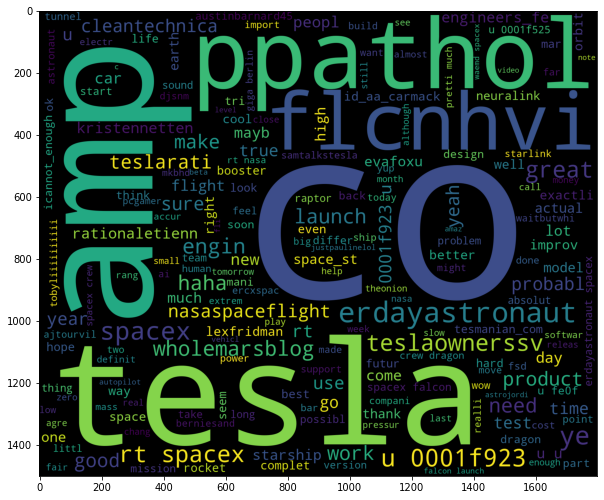

In [258]:
#wordcloud for entire corpus
plt.figure(figsize=(10,10))
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

This image show the different words which are used in the comments.with size of the words depending on the frequency of the words used

In [259]:
data1=data.copy()

In [260]:
def sentiment_val1(data):
  if data<0:
    x='Negative'
  elif data==0:
    x='Neutral'
  else:
    x='Positive'
  return x

Dropping unnecessory columns

In [261]:
data1.drop(['Unnamed: 0','Text','sentiment_values'],axis=1,inplace=True)

In [262]:
data1['Class']=data1['Sentiment_score'].map(sentiment_val1)
data1

,text,Sentiment_score,Class
0,kunalb11 alien,-0.250000,Negative
1,id_aa_carmack ray trace cyberpunk hdr next lev...,0.000000,Neutral
2,joerogan spotifi great interview,0.800000,Positive
3,gtera27 doge underestim,0.000000,Neutral
4,teslacn congratul tesla china amaz execut last...,0.000000,Neutral
...,...,...,...
1994,flcnhvi true sound surreal neg propaganda stil...,0.186667,Positive
1995,ppathol make sure read ur term amp condit clic...,0.500000,Positive
1996,teslagong ppathol samwis gamge,0.000000,Neutral
1997,ppathol altho dumb dumber u 0001f525 u 0001f525,-0.375000,Negative


Here from the centimental anlysis we can infer that majority is having a neutral review regarding the product ,followed by positive reviews

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


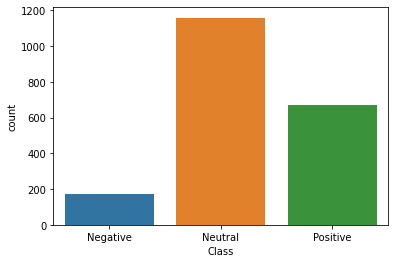

In [263]:
import seaborn as sns
sns.countplot(data1['Class'])

From this plot we can infer that most of the comments is giving a neutral reveiw followed by positive comments

**N-Gram**

In [264]:
from sklearn.feature_extraction.text import CountVectorizer

Function to find the Repeating words pairs

In [265]:
def get_freq_word(corpus,n=None):
  vec=CountVectorizer(ngram_range=(2,2),max_features=2000) #Creating object for the count vectorizer
  bag_of_words=vec.fit_transform(corpus)                    #getting the bag of words 
  sum_of_words=bag_of_words.sum(axis=0)                  #calculating the sum of words
  words_freq=[(word,sum_of_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda X:X[1],reverse=True)
  return words_freq[:n]


In [266]:
#Function calling
top20_words=get_freq_word(data['text'],n=200)
top20_words_df=pd.DataFrame(top20_words)
top20_words_df.columns=['Bi-gram','frequency']
top20_words_df.head()

,Bi-gram,frequency
0,http co,653
1,rt spacex,71
2,0001f923 0001f923,35
3,spacex falcon,17
4,erdayastronaut spacex,16


In [267]:
top20_words_df.iloc[0:20,:]

,Bi-gram,frequency
0,http co,653
1,rt spacex,71
2,0001f923 0001f923,35
3,spacex falcon,17
4,erdayastronaut spacex,16
5,crew dragon,14
6,giga berlin,12
7,pretti much,12
8,rt nasa,12
9,spacex crew,12


[Text(0, 0, 'http co'),
 Text(0, 0, 'rt spacex'),
 Text(0, 0, '0001f923 0001f923'),
 Text(0, 0, 'spacex falcon'),
 Text(0, 0, 'erdayastronaut spacex'),
 Text(0, 0, 'crew dragon'),
 Text(0, 0, 'giga berlin'),
 Text(0, 0, 'pretti much'),
 Text(0, 0, 'rt nasa'),
 Text(0, 0, 'spacex crew'),
 Text(0, 0, 'falcon launch'),
 Text(0, 0, 'waemd spacex'),
 Text(0, 0, 'nasa spacex'),
 Text(0, 0, 'first stage'),
 Text(0, 0, 'teslaratiteam teslarati'),
 Text(0, 0, 'falcon first'),
 Text(0, 0, 'stage land'),
 Text(0, 0, 'next week'),
 Text(0, 0, 'static fire'),
 Text(0, 0, 'erdayastronaut flcnhvi')]

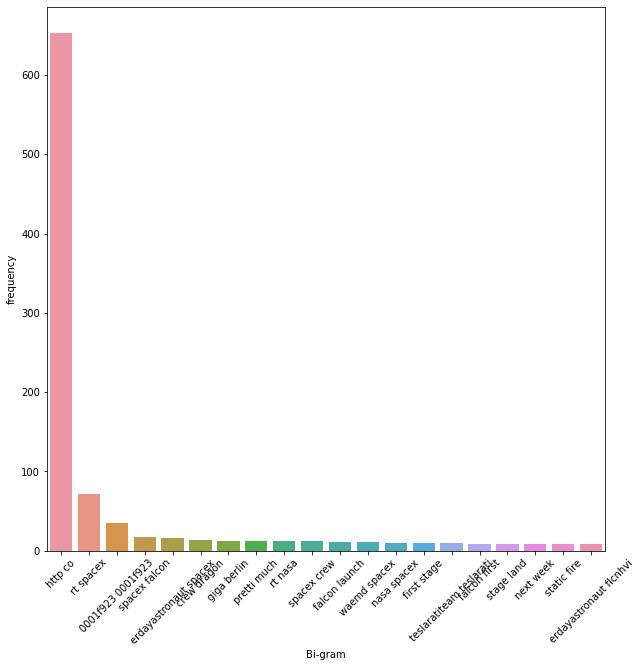

In [268]:
top_20bigram=top20_words_df.iloc[0:20,:]
plt.figure(figsize=(10,10,))
plot=sns.barplot(x=top_20bigram['Bi-gram'],y=top_20bigram['frequency'])
plot.set_xticklabels(rotation=45,labels=top_20bigram['Bi-gram'])

**Tri gram**

In [269]:
def get_top_n3_words(corpus,n=None):
  vec2=CountVectorizer(ngram_range=(3,3),max_features=2000)
  bag_of_words=vec2.fit_transform(corpus)
  sum_of_words=bag_of_words.sum(axis=0)
  word_freq=[(word,sum_of_words[0,idx]) for word,idx in vec2.vocabulary_.items()]
  word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)
  return word_freq[:n]

In [270]:
top_20_words=get_top_n3_words(data['text'],n=200) #n means top  i.e. top 200
top2_df=pd.DataFrame(top_20_words)
top2_df.columns=['Trigram','Frequency']
top2_df.head()

,Trigram,Frequency
0,rt spacex falcon,17
1,falcon first stage,9
2,first stage land,9
3,spacex falcon first,8
4,thesheetztweetz waemd spacex,8


**PLotting Trigram**

[Text(0, 0, 'rt spacex falcon'),
 Text(0, 0, 'falcon first stage'),
 Text(0, 0, 'first stage land'),
 Text(0, 0, 'spacex falcon first'),
 Text(0, 0, 'thesheetztweetz waemd spacex'),
 Text(0, 0, 'jgrano305 teslaratiteam teslarati'),
 Text(0, 0, 'cours still love'),
 Text(0, 0, 'ppathol thesheetztweetz waemd'),
 Text(0, 0, 'waemd spacex spacexstarlink'),
 Text(0, 0, 'spacex falcon launch'),
 Text(0, 0, '2192 http co'),
 Text(0, 0, 'rt spacex liftoff'),
 Text(0, 0, 'spacex liftoff http'),
 Text(0, 0, 'liftoff http co'),
 Text(0, 0, 'spacex spacexstarlink wanationalguard'),
 Text(0, 0, 'year http co'),
 Text(0, 0, '60 starlink satellit'),
 Text(0, 0, 'spacex felixschlang marcushousegam'),
 Text(0, 0, 'land cours still'),
 Text(0, 0, 'still love droneship')]

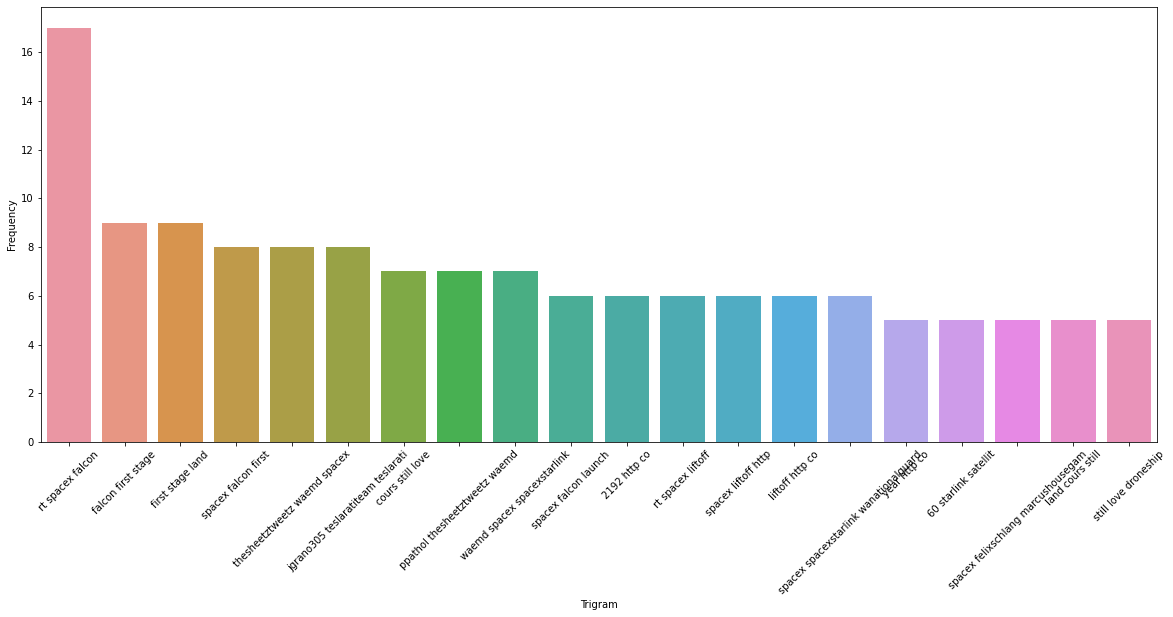

In [271]:
top20_trigram=top2_df.iloc[0:20,:]
plt.figure(figsize=(20,8))
plot=sns.barplot(x=top20_trigram['Trigram'],y=top20_trigram['Frequency'])
plot.set_xticklabels(rotation=45,labels=top20_trigram['Trigram'])

**Implimenting TFIDF-term frequency inverse document frequency**

In [272]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec3=TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)  #Keeps top 1000 words
doc_vec=vec3.fit_transform(data['text'])
name_features=vec3.get_feature_names()
dense=doc_vec.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=name_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [273]:
df.head()

,000,0001f1e9,0001f1ea,0001f339,0001f3b6,0001f440,0001f44c,0001f44d,0001f495,0001f4ab,...,yahoofin,ye,yeah,year,yesterday,yourfavga,yup,zainraz4,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.329288,0.0,0.0,0.0,0.0,0.0,0.0


**Applying Naive bayes for classification**

In [274]:
data2=data1.copy()

In [275]:
data2.head()

,text,Sentiment_score,Class
0,kunalb11 alien,-0.25,Negative
1,id_aa_carmack ray trace cyberpunk hdr next lev...,0.00,Neutral
2,joerogan spotifi great interview,0.80,Positive
3,gtera27 doge underestim,0.00,Neutral
4,teslacn congratul tesla china amaz execut last...,0.00,Neutral


**Dropping the remaining columns**

In [276]:
data2.drop(['Sentiment_score'],axis=1,inplace=True)
data2.head()

,text,Class
0,kunalb11 alien,Negative
1,id_aa_carmack ray trace cyberpunk hdr next lev...,Neutral
2,joerogan spotifi great interview,Positive
3,gtera27 doge underestim,Neutral
4,teslacn congratul tesla china amaz execut last...,Neutral


**Splitting the Data set**

In [277]:
from sklearn.model_selection import train_test_split
comment_train,comment_test=train_test_split(data2,test_size=.3)

In [278]:
comment_train

,text,Class
591,flcnhvi data center name skynet joke 10 year a...,Negative
743,ryaneshea moreov lower true preval higher fals...,Positive
1663,engineers_fe pretti much,Positive
314,id_aa_carmack hope wing work moon def well mar...,Neutral
1273,tjlk eeri parallel bore compani amp vault tec ...,Positive
...,...,...
1298,historyinp lego movi awesom,Neutral
223,batteri cell product fundament rate limit slow...,Negative
1623,kristennetten ppathol berniesand u 0001f923 u ...,Neutral
213,kristennetten spacex eliburton_ evafoxu janeid...,Positive


In [279]:
comment_test

,text,Class
59,dumdin7 grimezsz heard name year,Neutral
821,techamaz einstein great succeed engin tri,Positive
76,brendan2908 nasaspaceflight ye,Neutral
58,second last kingdom http co je4ei88hmv,Neutral
118,we5dogg teslaownerssv escap,Neutral
...,...,...
125,http co pyrcfe97xp,Neutral
1438,believ thing proportion evid true ye,Positive
1093,sciguyspac step right direct realli aim full r...,Positive
1475,dami_kolz09 u 0001f923,Neutral


In [280]:
def split_into_words(i):
  return(i.split(' '))

In [281]:
#prepaing Reviews into word count matrix format
comment_bow=CountVectorizer(analyzer=split_into_words).fit(data2.text)  #comment_bow is abag of word matrix using the entire data set
comment_bow_matrix=comment_bow.transform(data2.text)
#for all comments
comment_bow_matrix.shape

(1999, 4638)

In [282]:
#For training comments
train_comment_matrix=comment_bow.transform(comment_train.text)
train_comment_matrix.shape

(1399, 4638)

In [283]:
#for testing comments
test_comment_matrix=comment_bow.transform(comment_test.text)
test_comment_matrix.shape

(600, 4638)

In [284]:
#preparing naive bayes model on training data set
from sklearn.naive_bayes import MultinomialNB,GaussianNB

**Building model**

In [285]:
import numpy as np

In [286]:
model1_mb=MultinomialNB()
model1_mb.fit(train_comment_matrix,comment_train.Class)
y_pred_train=model1_mb.predict(train_comment_matrix)
accuracy_train=np.mean(y_pred_train==comment_train.Class)

**Trainning data set accuracy**

In [287]:
print(accuracy_train)

0.9742673338098642


**Testing accuracy**

In [288]:
y_pred_test=model1_mb.predict(test_comment_matrix)
accuracy_test=np.mean(y_pred_test==comment_test.Class)
print(accuracy_test)

0.7583333333333333


**The accuracy of the model is 76%**

**Using gaussian nb**

In [295]:
model2=GaussianNB()
model2.fit(train_comment_matrix.toarray(),comment_train.Class.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
y_pred_train=model1_mb.predict(train_comment_matrix.toarray())
accuracy_train=np.mean(y_pred_train==comment_train.Class)
print(accuracy_train)

0.9192280200142959


**The train accuracy is 92%**

In [297]:
y_pred_test=model2.predict(test_comment_matrix.toarray())
accuracy_test=np.mean(y_pred_test==comment_test.Class)
print(accuracy_test)

0.48833333333333334


**This model is having poor accuracy score of 48%**

**Using TF-IDF**

In [301]:
from sklearn.feature_extraction.text import TfidfTransformer
# Learning Term weighting and normalizing on entire emails
tfid_trans=TfidfTransformer().fit(comment_bow_matrix)
#preparing TF idf for training set and testing
train_tfidf=tfid_trans.transform(train_comment_matrix)
print(train_tfidf.shape)
test_tfidf=tfid_trans.transform(test_comment_matrix)
print(test_tfidf.shape)

(1399, 4638)
(600, 4638)


In [304]:
model3=MultinomialNB()
model3.fit(train_tfidf,comment_train.Class)
y_pred_train=model3.predict(test_tfidf)
accuracy_test=np.mean(y_pred_train==comment_test.Class)
print(accuracy_train)

0.7666666666666667


**The accuracy of the model is 76%**

In [306]:
y_pred_train=model3.predict(train_tfidf)
accuracy_train=np.mean(y_pred_train==comment_train.Class)
print(accuracy_train)

0.8791994281629736


**The training accuracy of the model is 87%**

In [308]:
model4=GaussianNB()
model4.fit(train_tfidf.toarray(),comment_train.Class.values)
y_pred_test=model4.predict(test_tfidf.toarray())
accuracy_test=np.mean(y_pred_test==comment_test.Class)
print(accuracy_test)

0.4666666666666667


**The test accuracy of this model is 46% which not good**

In [309]:
y_pred_train=model4.predict(train_tfidf.toarray())
accuracy_train=np.mean(y_pred_train==comment_train.Class)
print(accuracy_train)

0.9192280200142959


**The training accuracy of this model is 91%**

The best model **model1_mb** with accuracy score of **76% **